## Homework 4

Use this notebook as a starter

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

In [4]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


Some of the features are encoded as numbers. Use the following code to de-code them:

In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [6]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


Prepare the numerical variables:

In [7]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [8]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [9]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

What are the categorical variables? What are the numerical?

In [10]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [11]:
categorical = ["home", "marital", "records", "job"]
numerical = ["seniority", "time", "age", "expenses", "income", "assets", "debt", "amount", "price"]

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [12]:
full_train, test = train_test_split(df, test_size=0.2, random_state=1)
train, val = train_test_split(full_train, test_size=0.25, random_state=1)

In [13]:
y_full_train = full_train["default"]
y_train = train["default"]
y_val = val["default"]
y_test = test["default"]

# del full_train["default"]
# del train["default"]
# del val["default"]
# del test["default"]

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the default variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [14]:
numerical

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

In [15]:
for variable in numerical:
    auc = roc_auc_score(train["default"], train[variable])
    if auc < 0.5:
        print(variable, round(roc_auc_score(train["default"], -train[variable]), 3))
    else:
        print(variable, round(auc, 3))

seniority 0.709
time 0.561
age 0.573
expenses 0.501
income 0.682
assets 0.649
debt 0.505
amount 0.591
price 0.504


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

Answer: *Seniority*

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [16]:
features = ['seniority', 'income', 'assets', 'records', 'job', 'home']

In [17]:
dicts = train[features].to_dict(orient="records")
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
train = dv.transform(dicts)
train

array([[0.0e+00, 0.0e+00, 0.0e+00, ..., 1.0e+00, 0.0e+00, 1.2e+01],
       [0.0e+00, 0.0e+00, 1.0e+00, ..., 1.0e+00, 0.0e+00, 4.0e+00],
       [6.0e+03, 0.0e+00, 0.0e+00, ..., 1.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 1.0e+00, 9.0e+00],
       [3.0e+03, 0.0e+00, 0.0e+00, ..., 1.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 1.0e+00, 0.0e+00, 8.0e+00]])

In [18]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [19]:
dicts_val = val[features].to_dict(orient="records")
val = dv.transform(dicts_val)
val

array([[3.0e+04, 0.0e+00, 0.0e+00, ..., 0.0e+00, 1.0e+00, 1.5e+01],
       [4.0e+03, 0.0e+00, 0.0e+00, ..., 1.0e+00, 0.0e+00, 2.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 1.0e+00, 0.0e+00, 1.0e+00],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 1.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 1.0e+00, ..., 1.0e+00, 0.0e+00, 8.0e+00],
       [5.0e+03, 1.0e+00, 0.0e+00, ..., 1.0e+00, 0.0e+00, 0.0e+00]])

In [20]:
y_pred_val = model.predict_proba(val)
y_pred_val

array([[0.80313518, 0.19686482],
       [0.88243333, 0.11756667],
       [0.73018421, 0.26981579],
       ...,
       [0.49393931, 0.50606069],
       [0.55808902, 0.44191098],
       [0.48881914, 0.51118086]])

In [21]:
roc_auc_score(y_val, y_pred_val[:, 1])

0.8120879813449298

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [22]:
precisions = []
recalls = []

thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    y_preds_t = (y_pred_val[:,1] >= t)
    tp = (y_preds_t & y_val).sum()
    tn = (~y_preds_t & ~y_val).sum()
    fp = (y_preds_t & ~y_val).sum()
    fn = (~y_preds_t & y_val).sum()
    
    precisions.append(tp / (tp + fp))
    recalls.append(tp / (tp + fn))

C:\Users\admin\AppData\Local\Temp/ipykernel_16692/1673303362.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  precisions.append(tp / (tp + fp))


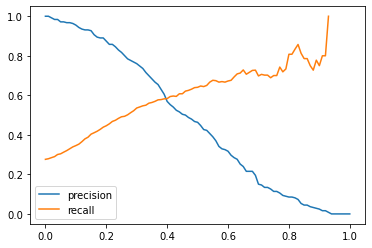

In [23]:
plt.plot(thresholds, recalls, label="precision")
plt.plot(thresholds, precisions, label="recall")
plt.legend()

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

Answer: 0.4

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [24]:
F1 = 2 * np.array(precisions) * np.array(recalls) / (np.array(precisions) + np.array(recalls))
F1

array([0.43271768, 0.43655723, 0.44242974, 0.44773358, 0.4605138 ,
       0.46317829, 0.47279921, 0.48129424, 0.49173554, 0.5015873 ,
       0.5075594 , 0.51384275, 0.52571429, 0.53945819, 0.54784689,
       0.5622688 , 0.5652725 , 0.56994819, 0.57783641, 0.58791946,
       0.59065934, 0.59520451, 0.60545194, 0.60729927, 0.61077844,
       0.61374046, 0.61085271, 0.61172742, 0.61712439, 0.62171053,
       0.62857143, 0.62798635, 0.62738302, 0.62190813, 0.62206148,
       0.61764706, 0.61423221, 0.61333333, 0.60311284, 0.5936255 ,
       0.57613169, 0.57263158, 0.56716418, 0.55723542, 0.55824176,
       0.55111111, 0.55405405, 0.54794521, 0.54503464, 0.5399061 ,
       0.53773585, 0.52884615, 0.51344743, 0.51231527, 0.50505051,
       0.49484536, 0.47769029, 0.4516129 , 0.44141689, 0.43715847,
       0.43093923, 0.41242938, 0.40345821, 0.39766082, 0.37237237,
       0.36085627, 0.33021807, 0.33125   , 0.3322884 , 0.30769231,
       0.24749164, 0.24242424, 0.22525597, 0.22525597, 0.21305

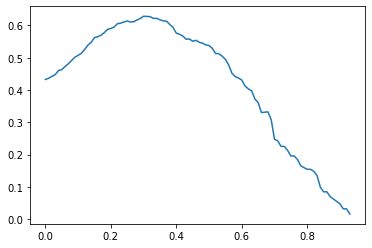

In [25]:
plt.plot(thresholds, F1)

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

Answer: 0.3

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [26]:
dv

DictVectorizer(sparse=False)

In [27]:
X_full_train = dv.transform(full_train[features].to_dict(orient="records"))

In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

aucs = []

for train_index, val_index in kf.split(X_full_train):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    
    model.fit(X_full_train[train_index], y_full_train.values[train_index])
    
    pred_probas = model.predict_proba(X_full_train[val_index])[:, 1]
    
    auc = roc_auc_score(y_full_train.values[val_index], pred_probas)
    aucs.append(auc)

In [29]:
aucs

[0.8256212256212256,
 0.8254176350237372,
 0.7893383818254285,
 0.8250108084738436,
 0.8054696294614563]

In [30]:
np.std(aucs)

0.014611424893554475

How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

Answer: 0.014

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)


for c in [0.01, 0.1, 1, 10]:
    aucs = []
    for train_index, val_index in kf.split(X_full_train):
        model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)

        model.fit(X_full_train[train_index], y_full_train.values[train_index])

        pred_probas = model.predict_proba(X_full_train[val_index])[:, 1]

        auc = roc_auc_score(y_full_train.values[val_index], pred_probas)
        aucs.append(auc)
    print(f"{c}: mean = {round(np.mean(aucs), 3)}, std = {round(np.std(aucs), 3)}")

0.01: mean = 0.808, std = 0.012
0.1: mean = 0.813, std = 0.014
1: mean = 0.814, std = 0.015
10: mean = 0.814, std = 0.015


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

Answer: 1

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.